## Batch Normalizationの評価

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
============== 1/16 ==============
epoch:0 | 0.105 - 0.097
epoch:1 | 0.097 - 0.109


/Users/nicole/book_zerodeep/zerodeep2018/2018_06_25/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/nicole/book_zerodeep/zerodeep2018/2018_06_25/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/nicole/book_zerodeep/zerodeep2018/2018_06_25/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.105
epoch:3 | 0.097 - 0.138
epoch:4 | 0.097 - 0.156
epoch:5 | 0.097 - 0.167
epoch:6 | 0.097 - 0.184
epoch:7 | 0.097 - 0.199
epoch:8 | 0.097 - 0.215
epoch:9 | 0.097 - 0.233
epoch:10 | 0.097 - 0.237
epoch:11 | 0.097 - 0.26
epoch:12 | 0.097 - 0.284
epoch:13 | 0.097 - 0.293
epoch:14 | 0.097 - 0.31
epoch:15 | 0.097 - 0.333
epoch:16 | 0.097 - 0.347
epoch:17 | 0.097 - 0.352
epoch:18 | 0.097 - 0.374
epoch:19 | 0.097 - 0.382
============== 2/16 ==============
epoch:0 | 0.094 - 0.07
epoch:1 | 0.097 - 0.078
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.111
epoch:4 | 0.097 - 0.132
epoch:5 | 0.097 - 0.169
epoch:6 | 0.097 - 0.192
epoch:7 | 0.097 - 0.208
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.271
epoch:10 | 0.097 - 0.293
epoch:11 | 0.097 - 0.316
epoch:12 | 0.097 - 0.338
epoch:13 | 0.097 - 0.351
epoch:14 | 0.097 - 0.372
epoch:15 | 0.097 - 0.382
epoch:16 | 0.097 - 0.399
epoch:17 | 0.097 - 0.412
epoch:18 | 0.097 - 0.424
epoch:19 | 0.097 - 0.432
============== 3/16 ==============
e

epoch:18 | 0.116 - 0.429
epoch:19 | 0.116 - 0.429


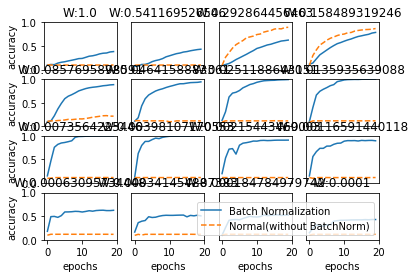

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## Weight Decay

epoch:0, train acc:0.123333333333, test acc:0.1105
epoch:1, train acc:0.153333333333, test acc:0.1186
epoch:2, train acc:0.196666666667, test acc:0.1414
epoch:3, train acc:0.216666666667, test acc:0.1624
epoch:4, train acc:0.273333333333, test acc:0.1844
epoch:5, train acc:0.313333333333, test acc:0.2262
epoch:6, train acc:0.32, test acc:0.2295
epoch:7, train acc:0.336666666667, test acc:0.26
epoch:8, train acc:0.343333333333, test acc:0.2725
epoch:9, train acc:0.36, test acc:0.2823
epoch:10, train acc:0.353333333333, test acc:0.2918
epoch:11, train acc:0.383333333333, test acc:0.3058
epoch:12, train acc:0.383333333333, test acc:0.3048
epoch:13, train acc:0.396666666667, test acc:0.3112
epoch:14, train acc:0.413333333333, test acc:0.3219
epoch:15, train acc:0.436666666667, test acc:0.3338
epoch:16, train acc:0.45, test acc:0.3399
epoch:17, train acc:0.47, test acc:0.3408
epoch:18, train acc:0.473333333333, test acc:0.3521
epoch:19, train acc:0.463333333333, test acc:0.3494
epoch:20, tr

epoch:167, train acc:0.923333333333, test acc:0.72
epoch:168, train acc:0.92, test acc:0.7202
epoch:169, train acc:0.916666666667, test acc:0.7191
epoch:170, train acc:0.916666666667, test acc:0.7254
epoch:171, train acc:0.913333333333, test acc:0.7242
epoch:172, train acc:0.923333333333, test acc:0.7186
epoch:173, train acc:0.916666666667, test acc:0.7181
epoch:174, train acc:0.92, test acc:0.726
epoch:175, train acc:0.92, test acc:0.7257
epoch:176, train acc:0.933333333333, test acc:0.7335
epoch:177, train acc:0.913333333333, test acc:0.7279
epoch:178, train acc:0.926666666667, test acc:0.7212
epoch:179, train acc:0.926666666667, test acc:0.7241
epoch:180, train acc:0.92, test acc:0.7306
epoch:181, train acc:0.933333333333, test acc:0.7278
epoch:182, train acc:0.916666666667, test acc:0.7259
epoch:183, train acc:0.923333333333, test acc:0.731
epoch:184, train acc:0.923333333333, test acc:0.726
epoch:185, train acc:0.926666666667, test acc:0.7285
epoch:186, train acc:0.916666666667, t

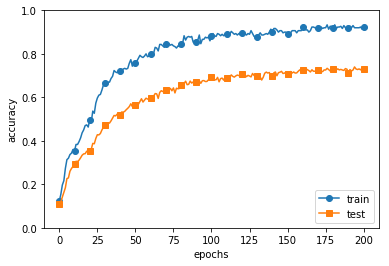

In [2]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Dropout

train loss:2.29890435577
=== epoch:1, train acc:0.08, test acc:0.094 ===
train loss:2.30925725181
train loss:2.30730254654
train loss:2.29506646277
=== epoch:2, train acc:0.0833333333333, test acc:0.0945 ===
train loss:2.32701318022
train loss:2.29719164143
train loss:2.28103248552
=== epoch:3, train acc:0.08, test acc:0.0945 ===
train loss:2.30792971567
train loss:2.30951658666
train loss:2.28739446585
=== epoch:4, train acc:0.0833333333333, test acc:0.0953 ===
train loss:2.29738399464
train loss:2.2839395061
train loss:2.29324798112
=== epoch:5, train acc:0.0833333333333, test acc:0.0957 ===
train loss:2.31329364538
train loss:2.29426689969
train loss:2.29431473295
=== epoch:6, train acc:0.0833333333333, test acc:0.0956 ===
train loss:2.30240887795
train loss:2.29459370121
train loss:2.29109785155
=== epoch:7, train acc:0.0833333333333, test acc:0.0961 ===
train loss:2.27928444328
train loss:2.30524473856
train loss:2.30584102474
=== epoch:8, train acc:0.09, test acc:0.0976 ===
train

=== epoch:64, train acc:0.35, test acc:0.3093 ===
train loss:2.19842155122
train loss:2.20675536352
train loss:2.2046016718
=== epoch:65, train acc:0.356666666667, test acc:0.3094 ===
train loss:2.22429923949
train loss:2.2239615966
train loss:2.20383620958
=== epoch:66, train acc:0.36, test acc:0.309 ===
train loss:2.18717852643
train loss:2.22394311107
train loss:2.18409504832
=== epoch:67, train acc:0.356666666667, test acc:0.3133 ===
train loss:2.21276002377
train loss:2.19889312604
train loss:2.21653304414
=== epoch:68, train acc:0.363333333333, test acc:0.3137 ===
train loss:2.21491753322
train loss:2.21199450371
train loss:2.20148961405
=== epoch:69, train acc:0.356666666667, test acc:0.3115 ===
train loss:2.19811971711
train loss:2.19592754148
train loss:2.21299575408
=== epoch:70, train acc:0.363333333333, test acc:0.3093 ===
train loss:2.17749248087
train loss:2.18365612924
train loss:2.20810950022
=== epoch:71, train acc:0.37, test acc:0.3117 ===
train loss:2.17481319928
tra

=== epoch:127, train acc:0.41, test acc:0.3407 ===
train loss:1.99504004254
train loss:2.01298509045
train loss:1.98152526441
=== epoch:128, train acc:0.42, test acc:0.3414 ===
train loss:2.01383388441
train loss:2.07131317298
train loss:2.00821598821
=== epoch:129, train acc:0.42, test acc:0.3396 ===
train loss:1.96919304857
train loss:1.99324591728
train loss:2.05484811114
=== epoch:130, train acc:0.416666666667, test acc:0.3371 ===
train loss:1.95850684761
train loss:2.04278831055
train loss:1.91625477663
=== epoch:131, train acc:0.42, test acc:0.3422 ===
train loss:2.03870375475
train loss:1.99276936341
train loss:2.02312497097
=== epoch:132, train acc:0.416666666667, test acc:0.3425 ===
train loss:2.066808453
train loss:2.00517879507
train loss:2.03051283066
=== epoch:133, train acc:0.413333333333, test acc:0.3435 ===
train loss:1.96848598428
train loss:1.9907789792
train loss:1.94232705451
=== epoch:134, train acc:0.41, test acc:0.3411 ===
train loss:2.01747243523
train loss:1.99

=== epoch:190, train acc:0.453333333333, test acc:0.4105 ===
train loss:1.79725600627
train loss:1.67324492876
train loss:1.77089773437
=== epoch:191, train acc:0.456666666667, test acc:0.4147 ===
train loss:1.73352910163
train loss:1.67129757384
train loss:1.80826089004
=== epoch:192, train acc:0.46, test acc:0.4159 ===
train loss:1.65507705907
train loss:1.77508599874
train loss:1.70985474554
=== epoch:193, train acc:0.456666666667, test acc:0.416 ===
train loss:1.79129170645
train loss:1.64731820704
train loss:1.6492088006
=== epoch:194, train acc:0.456666666667, test acc:0.422 ===
train loss:1.68266193801
train loss:1.63551202933
train loss:1.65134435459
=== epoch:195, train acc:0.456666666667, test acc:0.4197 ===
train loss:1.77087366109
train loss:1.69939279065
train loss:1.70611333341
=== epoch:196, train acc:0.463333333333, test acc:0.4232 ===
train loss:1.76235491939
train loss:1.76640771483
train loss:1.77201118572
=== epoch:197, train acc:0.46, test acc:0.423 ===
train loss:

=== epoch:253, train acc:0.563333333333, test acc:0.4906 ===
train loss:1.23149077972
train loss:1.34992716893
train loss:1.4607463935
=== epoch:254, train acc:0.566666666667, test acc:0.4911 ===
train loss:1.50140004827
train loss:1.35636490439
train loss:1.31874420533
=== epoch:255, train acc:0.56, test acc:0.4913 ===
train loss:1.34156265798
train loss:1.35320321974
train loss:1.52516017964
=== epoch:256, train acc:0.563333333333, test acc:0.4922 ===
train loss:1.36941264858
train loss:1.32381473282
train loss:1.51250130438
=== epoch:257, train acc:0.573333333333, test acc:0.4986 ===
train loss:1.32349274746
train loss:1.31523304028
train loss:1.43992225069
=== epoch:258, train acc:0.573333333333, test acc:0.5006 ===
train loss:1.35922803912
train loss:1.28437824824
train loss:1.32930715085
=== epoch:259, train acc:0.573333333333, test acc:0.5004 ===
train loss:1.42985031411
train loss:1.45671829272
train loss:1.39738383911
=== epoch:260, train acc:0.58, test acc:0.5037 ===
train lo

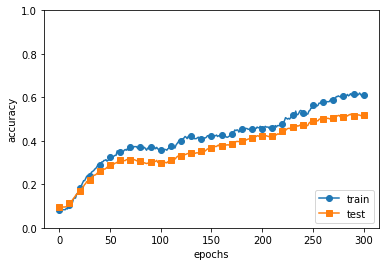

In [3]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## ハイパーパラメータの最適化

val acc:0.67 | lr:0.0038180412340680747, weight decay:9.220094180302456e-08
val acc:0.07 | lr:3.0934229781782407e-05, weight decay:6.4433274180742856e-06
val acc:0.08 | lr:4.562084787839937e-05, weight decay:1.2644731609838905e-07
val acc:0.06 | lr:4.967164890943343e-05, weight decay:9.97636177095786e-06
val acc:0.77 | lr:0.009874100846783513, weight decay:1.8139981039052038e-07
val acc:0.09 | lr:4.217658328475474e-05, weight decay:3.65731053601781e-05
val acc:0.68 | lr:0.007891896178982663, weight decay:4.336283846403922e-07
val acc:0.11 | lr:0.00014781178857044855, weight decay:3.69689768826082e-05
val acc:0.33 | lr:0.0014563258122810695, weight decay:4.080636653702031e-06
val acc:0.06 | lr:5.359136950876169e-05, weight decay:2.0050527089336684e-08
val acc:0.11 | lr:1.3757630193449428e-06, weight decay:9.047613978386814e-06
val acc:0.09 | lr:0.000281308195483161, weight decay:8.521626517948876e-06
val acc:0.16 | lr:1.5757199868381274e-05, weight decay:6.81600739716127e-05
val acc:0.0

Best-18(val acc:0.33) | lr:0.0014563258122810695, weight decay:4.080636653702031e-06
Best-19(val acc:0.32) | lr:0.0013864295994692093, weight decay:1.326927710882695e-07
Best-20(val acc:0.3) | lr:0.001892695898733281, weight decay:6.85450346443901e-07


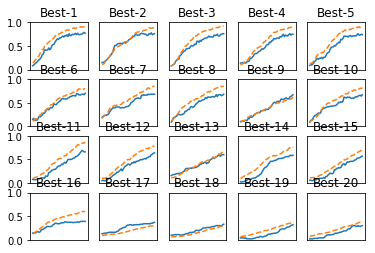

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = x_train.shape[0] * validation_rate
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:int(validation_num)]
t_val = t_train[:int(validation_num)]
x_train = x_train[int(validation_num):]
t_train = t_train[int(validation_num):]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()